<a href="https://colab.research.google.com/github/canerskrc/Borusan_Kod_Adi_Dijital/blob/main/borusan_day15_model_metrikleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv("Car_Tyres_Dataset.csv")

df["Selling Price"] = df["Selling Price"].str.replace(",", "").astype(float)
df["Original Price"] = df["Original Price"].str.replace(",", "").astype(float)

df = df.dropna(subset=["Rating"])

df["need_change"] = (df["Rating"] < 4 ).astype(int)

print(df["need_change"].value_counts())

need_change
0    1762
1     486
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Rating", "need_change"])
y = df["need_change"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify = y)

categorical_cols = ["Brand ","Model","Submodel","Tyre Brand","Serial No.","Type","Size"]
numeric_cols = ["Selling Price","Original Price","Load Index"]
#PipeLine: kategorikler için OneHot, sayılar direkt geçsin
preprocessor = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(handle_unknown="ignore"),categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(
        penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter= 5000
    ))
])

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

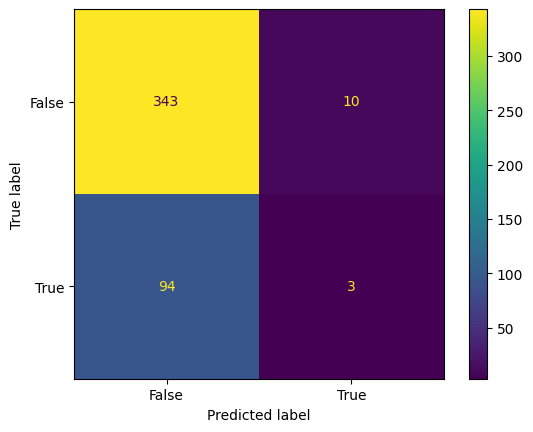

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot()